# 02: Exploratory Data Analysis
---

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. ACT

In [2]:
act = pd.read_csv('../data/clean_act_2019_ca.csv')

In [3]:
act

,school_name,district_name,county_name,grade_12_enrollment,total_num_test_takers,avg_reading,avg_english,avg_math,avg_science,num_test_takers_21,perc_participation,pct_test_takers_21,year
0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23.0,22.0,22.0,23.0,34.0,11.447084,64.15,2018-19
1,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21.0,20.0,23.0,22.0,11.0,8.407080,57.89,2018-19
2,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15.0,15.0,17.0,16.0,3.0,50.769231,9.09,2018-19
3,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18.0,18.0,18.0,17.0,5.0,12.698413,31.25,2018-19
4,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29.0,29.0,25.0,25.0,34.0,34.615385,94.44,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448.0,104.0,25.0,24.0,25.0,24.0,83.0,23.214286,79.81,2018-19
1363,Yosemite High,Yosemite Unified,Madera,135.0,33.0,22.0,21.0,22.0,22.0,19.0,24.444444,57.58,2018-19
1364,Yreka High,Yreka Union High,Siskiyou,138.0,38.0,23.0,20.0,21.0,21.0,20.0,27.536232,52.63,2018-19
1365,Yuba City High,Yuba City Unified,Sutter,394.0,56.0,23.0,21.0,22.0,22.0,35.0,14.213198,62.50,2018-19


### 2.1. Schools, districts and counties

In [4]:
# Original school, district and county totals

print('TOTAL COUNTS')

print('schools: ' + str(act.shape[0]))
print('districts: ' + str(act["district_name"].nunique()))
print('counties: ' + str(act["county_name"].nunique()))

TOTAL COUNTS
schools: 1367
districts: 353
counties: 54


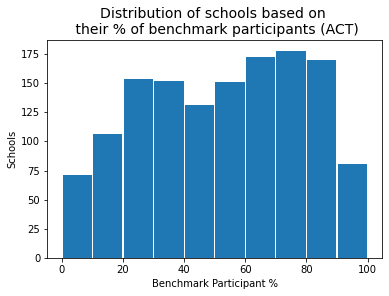

In [5]:
# Distribution of schools based on their % of benchmark participants (ACT)

act['pct_test_takers_21'].hist(rwidth=0.96)

plt.title('Distribution of schools based on \n their % of benchmark participants (ACT)', fontsize=14)
plt.xlabel('Benchmark Participant %')
plt.ylabel('Schools')
plt.grid(False);

As a first look at how California schools are performing, here is the distribution of schools based on their percent of participants who met or exceeded the benchmark score. The distribution is not uniform, normal or skewed. There are 2 peaks, the 50-90% range and the 20-40% range, which hints to a bimodal distribution, but it's not a very strong one. The lowest points are both sides of the distribution, the 0-10% range and the 90-100% range. Both are around 75 schools.

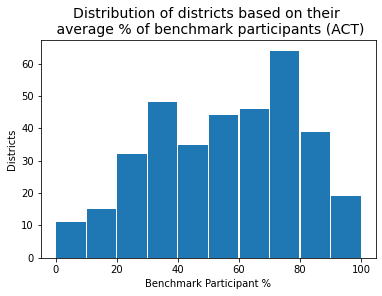

In [6]:
# Distribution of districts based on their average % of benchmark participants (ACT)

act_by_dist = act.groupby('district_name')[['pct_test_takers_21']].mean()

act_by_dist.hist(rwidth=0.96)

plt.title('Distribution of districts based on their \n average % of benchmark participants (ACT)', fontsize=14)
plt.xlabel('Benchmark Participant %')
plt.ylabel('Districts')
plt.grid(False);

At the district level, the distribution becomes left-skewed. The 70-80% range is the largest peak with 60+ districts, followed by the 30-40% range with just under 50 districts. The lowest point is the 0-10% range with just over 10 districts.

In [7]:
# Subsetted DataFrame to schools where < 10% of participants met the 21 benchmark

act_21_below_10_perc = act[act['pct_test_takers_21'] < 10]

print('COUNTS WHERE < 10% OF PARTICIPANTS MET THE 21 BENCHMARK')
print('schools: ' + str(act_21_below_10_perc.shape[0]))
print('districts: ' + str(act_21_below_10_perc["district_name"].nunique()))
print('counties: ' + str(act_21_below_10_perc["county_name"].nunique()))

print('')

print('PERCENT WHERE < 10% OF PARTICIPANTS MET THE 21 BENCHMARK')
print('schools: ' + str(round(act_21_below_10_perc.shape[0] / act.shape[0] * 100, 2)) + '%')
print('districts: ' + str(round(act_21_below_10_perc["district_name"].nunique() / act["district_name"].nunique() * 100, 2)) + '%')
print('counties: ' + str(round(act_21_below_10_perc["county_name"].nunique() / act["county_name"].nunique() * 100, 2)) + '%')

COUNTS WHERE < 10% OF PARTICIPANTS MET THE 21 BENCHMARK
schools: 71
districts: 29
counties: 15

PERCENT WHERE < 10% OF PARTICIPANTS MET THE 21 BENCHMARK
schools: 5.19%
districts: 8.22%
counties: 27.78%


The 0-10% range was the lowest point in both the school and district level distributions. However, having any schools or districts fall in that range is alarming. 

For a better understanding, I've calculated the counts of schools, districts and counties where less than 10% of participants met the benchmark score of 21. I've also calculated the percentages of those schools, districts and counties relative to their respective totals.

As a result, 5% of schools fall in the 0-10% range, while 8% of districts and 28% of counties are associated with schools that fall in the 0-10% range.

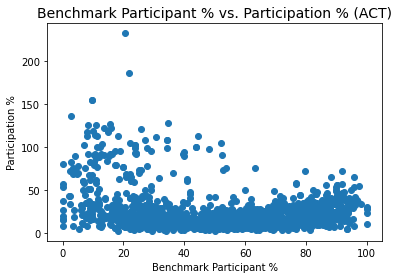

In [8]:
# Benchmark Participant % vs. Participation % (ACT)

plt.scatter(act['pct_test_takers_21'],
            act['perc_participation']);

plt.title('Benchmark Participant % vs. Participation % (ACT)', fontsize = 14)
plt.xlabel('Benchmark Participant %')
plt.ylabel('Participation %');

In wondering if there's any relation between the percent of enrolled students who participated and the percent of participants who met or exceeded the benchmark score, I plotted them together in a scatter plot.

At the school level, there are no signs of correlation. Though, it's interesting to note that schools with more than 50% participation mostly fell under 40% for participants who met or exceeded the benchmark score.

In [9]:
# Identifying districts and counties with an average < 10% meeting the 21 benchmark

act_21_below_10_perc_dist = act_21_below_10_perc.groupby(['county_name','district_name'])[['pct_test_takers_21']].mean().sort_values(by='pct_test_takers_21',ascending=True)
print(act_21_below_10_perc_dist.value_counts('county_name'))
act_21_below_10_perc_dist.head(29).sort_values(by='pct_test_takers_21', ascending=False)

county_name
Fresno            6
Los Angeles       5
Alameda           2
Riverside         2
Sacramento        2
San Bernardino    2
Santa Clara       2
Contra Costa      1
Kern              1
Kings             1
Modoc             1
Monterey          1
San Diego         1
San Francisco     1
San Mateo         1
dtype: int64


,,pct_test_takers_21
county_name,district_name,
San Mateo,Ravenswood City Elementary,9.680000
Fresno,Firebaugh-Las Deltas Unified,9.680000
Alameda,California School for the Deaf-Fremont (State Special Schl),9.520000
Monterey,South Monterey County Joint Union High,9.430000
Los Angeles,SBE - Academia Avance Charter,9.090000
San Bernardino,San Bernardino City Unified,9.090000
Sacramento,Natomas Unified,9.050000
Santa Clara,San Jose Unified,8.770000
Kern,Mojave Unified,8.545000


There are 29 districts that are associated with worst-performing schools. Because these are too many to work with, I'm zooming out to the county level. 

The counties most associated with worst-performing schools are Fresno and Los Angeles. Fresno contains 6 districts and Los Angeles contains 5. The rest of the counties are only associated with 1 or 2 districts.

### 2.2. Subjects

In [10]:
# Calculating the average scores for each of the subjects

act_sub_avg = act[['avg_reading','avg_english','avg_math','avg_science']].mean().round(0)
act_21_below_10_perc_sub_avg = act_21_below_10_perc[['avg_reading','avg_english','avg_math','avg_science']].mean().round(0)

print('Overall Schools Average')
print(act_sub_avg)
print('')
print('Worst-Performing Schools Average')
print(act_21_below_10_perc_sub_avg)

Overall Schools Average
avg_reading    22.0
avg_english    21.0
avg_math       21.0
avg_science    21.0
dtype: float64

Worst-Performing Schools Average
avg_reading    16.0
avg_english    14.0
avg_math       16.0
avg_science    16.0
dtype: float64


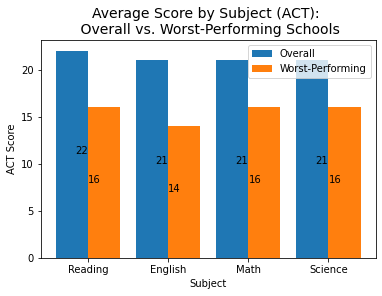

In [11]:
# Average Score by Subject (ACT): Overall vs. Worst-Performing Schools

# Plotting a barchart
plt.bar(np.arange(4) -0.2, act_sub_avg, width=0.4, label = 'Overall')
plt.bar(np.arange(4) +0.2, act_21_below_10_perc_sub_avg, width=0.4, label = 'Worst-Performing')

# Defining a function that will be used to include bar labels in a barchart
def add_labels_bar(x,y,ha='center'):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = ha)

if __name__ == '__main__':
    x = ['Reading','English','Math','Science']
    y1 = [22,21,21,21]
    y2 = [16,14,16,16]

add_labels_bar(x,y1,ha='right')
add_labels_bar(x,y2,ha='left')

plt.title('Average Score by Subject (ACT): \n Overall vs. Worst-Performing Schools', fontsize=14)
plt.xlabel('Subject')
plt.ylabel('ACT Score')
plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
plt.legend();

The overall average scores all meet or exceed the established benchmark score of 21. The worst-performing schools' average scores fall 5-7 points below the benchmark score of 21.

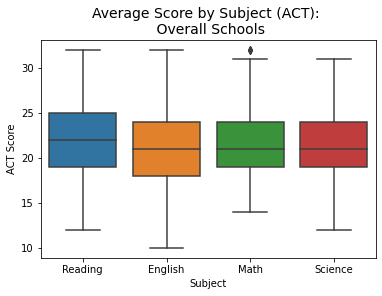

In [12]:
# Average Score by Subject (ACT): Overall Schools

sns.boxplot(data=act[['avg_reading','avg_english','avg_math','avg_science']])

plt.title('Average Score by Subject (ACT): \n Overall Schools', fontsize=14)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
plt.ylabel('ACT Score');

The box plot above shows the center and spread of the overall average scores. The center for Reading is 22, and the centers for English, Math and Science are 21. All have large spreads that roughly span from 19 to 25, with whiskers extending as low as 10 and as high as 32. There is only one outlier school. It's for math and it lies beyond the maximum.

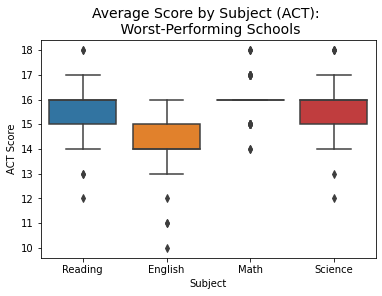

In [13]:
# Average Score by Subject (ACT): Worst-Performing Schools

sns.boxplot(data=act_21_below_10_perc[['avg_reading','avg_english','avg_math','avg_science']])

plt.title('Average Score by Subject (ACT): \n Worst-Performing Schools', fontsize=14)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
plt.ylabel('ACT Score');

This box plot shows the center and spread of the worst-performing school average scores. Reading and Science don't have a center, but span between 15-16, and the whiskers extend as low as 14 and as high as 17. English falls little lower on the scale spanning between 14-15 with whiskers extending as low as 13 and as high as 16. Math does not have a spread, but has its center at 16. All subjects have a few outliers that lie beyond the minimum and maximums.

### 2.3. ACT Summary

The counties most associated with worst-performing schools are Fresno and Los Angeles.

As for subjects, there doesn't seem to be one subject that is giving participants a more difficult time than the rest. All subjects will require the same focus when it comes to re-allocating resources.

---

## 3. SAT

In [14]:
sat = pd.read_csv('../data/clean_sat_2019_ca.csv')

In [15]:
sat

,school_name,district_name,county_name,grade_12_enrollment,total_num_test_takers,num_erw_benchmark,pct_erw_benchmark,num_math_benchmark,pct_math_benchmark,num_test_takers_benchmark,perc_participation,pct_test_takers_benchmark,year
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,30.39,14.0,13.73,14.0,49.514563,13.73,2018-19
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,47.79,18.0,15.93,18.0,49.779736,15.93,2018-19
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68.0,64.15,36.0,33.96,36.0,63.855422,33.96,2018-19
3,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161.0,84.74,138.0,72.63,132.0,33.807829,69.47,2018-19
4,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3.0,17.65,2.0,11.76,2.0,14.912281,11.76,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,NaN,San Joaquin County Office of Education,San Joaquin,823.0,78.0,48.0,61.54,19.0,24.36,19.0,9.477521,24.36,2018-19
1663,NaN,Pajaro Valley Unified,Santa Cruz,1315.0,372.0,230.0,61.83,142.0,38.17,133.0,28.288973,35.75,2018-19
1664,NaN,Scotts Valley Unified,Santa Cruz,194.0,90.0,84.0,93.33,73.0,81.11,73.0,46.391753,81.11,2018-19
1665,NaN,Riverbank Unified,Stanislaus,179.0,40.0,23.0,57.50,13.0,32.50,11.0,22.346369,27.50,2018-19


### 3.1. Schools, districts and counties

In [16]:
# Original school, district and county totals

print('TOTAL COUNTS')

print('schools: ' + str(sat.shape[0]))
print('districts: ' + str(sat["district_name"].nunique()))
print('counties: ' + str(sat["county_name"].nunique()))

TOTAL COUNTS
schools: 1667
districts: 406
counties: 55


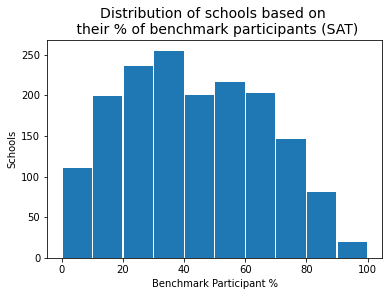

In [17]:
# Distribution of schools based on their % of benchmark participants (SAT)

sat['pct_test_takers_benchmark'].hist(rwidth=0.96)

plt.title('Distribution of schools based on \n their % of benchmark participants (SAT)', fontsize=14)
plt.xlabel('Benchmark Participant %')
plt.ylabel('Schools')
plt.grid(False);

As done with the ACT, here is the distribution of schools based on their percent of participants who met or exceeded the benchmark score. The distribution is between a normal and slightly right skewed one. The bins slowly increase until the peak at the 30-40% range with just over 250 schools, and then they begin decreasing until they reach 100%.

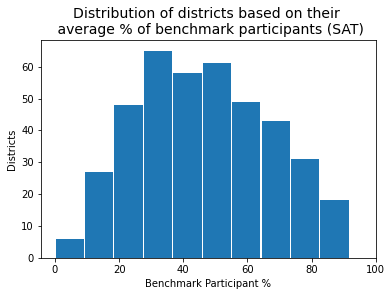

In [18]:
# Distribution of districts based on their average % of benchmark participants (SAT)

sat_by_dist = sat.groupby('district_name')[['pct_test_takers_benchmark']].mean()

sat_by_dist.hist(rwidth=0.96)

plt.title('Distribution of districts based on their \n average % of benchmark participants (SAT)', fontsize=14)
plt.xlabel('Benchmark Participant %')
plt.xticks(range(0,101,20))
plt.ylabel('Districts')
plt.grid(False);

At the district level, the distribution becomes a little more normal, but the peak remains to be around the 30-40% range. The lowest point is the 0-10% range with under 10 districts.

In [19]:
# Subsetted DataFrame to schools where < 10% of participants met the benchmark scores for both ERW & MATH

sat_benchmark_below_10_perc = sat[sat['pct_test_takers_benchmark'] < 10]

print('COUNTS WHERE < 10% of TAKERS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH')
print('schools: ' + str(sat_benchmark_below_10_perc.shape[0]))
print('districts: ' + str(sat_benchmark_below_10_perc["district_name"].nunique()))
print('counties: ' + str(sat_benchmark_below_10_perc["county_name"].nunique()))
print('')
print('PERCENT WHERE < 10% of TAKERS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH')
print('schools: ' + str(round(sat_benchmark_below_10_perc.shape[0] / sat.shape[0] * 100, 2)) + '%')
print('districts: ' + str(round(sat_benchmark_below_10_perc["district_name"].nunique() / sat["district_name"].nunique() * 100, 2)) + '%')
print('counties: ' + str(round(sat_benchmark_below_10_perc["county_name"].nunique() / sat["county_name"].nunique() * 100, 2)) + '%')

COUNTS WHERE < 10% of TAKERS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH
schools: 110
districts: 38
counties: 17

PERCENT WHERE < 10% of TAKERS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH
schools: 6.6%
districts: 9.36%
counties: 30.91%


Here, I've calculated the counts of schools, districts and counties where less than 10% of participants met both the Math and ERW benchmark scores. I've also calculated the percentages of those schools, districts and counties relative to their respective totals.

As a result, 6% of schools fall in the 0-10% range, while 9% of districts and 31% of counties are associated with schools that fall in the 0-10% range.

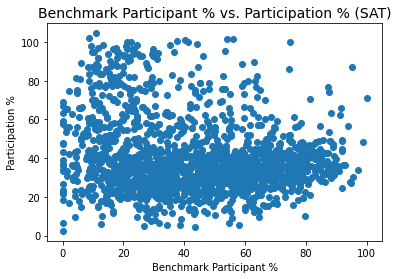

In [20]:
# Benchmark Participant % vs. Participation % (SAT)

plt.scatter(sat['pct_test_takers_benchmark'],
            sat['perc_participation']);

plt.title('Benchmark Participant % vs. Participation % (SAT)', fontsize = 14)
plt.xlabel('Benchmark Participant %')
plt.ylabel('Participation %');

At the school level, as with the ACT, there are no signs of correlation between the percent of enrolled students who participated and the percent of participants who met or exceeded both the Math and ERW benchmark scores.

In [21]:
# Identifying districts and counties with an average < 10% meeting the both ERW and Math benchmarks

sat_benchmark_below_10_perc_dist = sat_benchmark_below_10_perc.groupby(['county_name','district_name'])[['pct_test_takers_benchmark']].mean().sort_values(by='pct_test_takers_benchmark',ascending=True)
print(sat_benchmark_below_10_perc_dist.value_counts('county_name'))
sat_benchmark_below_10_perc_dist.head(60).sort_values(by='pct_test_takers_benchmark', ascending=False)

county_name
Los Angeles       10
Riverside          4
Fresno             4
San Bernardino     3
Alameda            2
Santa Clara        2
San Diego          2
Orange             2
Colusa             1
Monterey           1
Sacramento         1
Kern               1
Inyo               1
San Francisco      1
Contra Costa       1
Sonoma             1
Ventura            1
dtype: int64


,,pct_test_takers_benchmark
county_name,district_name,
Fresno,Washington Unified,9.760000
Los Angeles,Antelope Valley Union High,9.685000
Riverside,Val Verde Unified,9.610000
Sonoma,Cloverdale Unified,9.520000
Riverside,Hemet Unified,9.520000
Los Angeles,Long Beach Unified,9.500000
Kern,McFarland Unified,9.090000
Los Angeles,Acton-Agua Dulce Unified,7.890000
Monterey,South Monterey County Joint Union High,7.550000


The counties most associated with worst-performing districts are Los Angeles, Riverside and Fresno. Riverside contains 10 districts, Riverside contains 4 and Fresno contains 4. The rest of the couunties are only associated with 1 or 2 districts. 

### 3.2. Subjects

***Note:*** *Unlike the ACT dataset, the SAT dataset did not include the schools' average scores. Instead, it included the percentage of participants that met each of the subjects' benchmark score. As a result, that information will be used to gauge subject performance.*

In [22]:
# Calculating the average percent of participants who met the benchmark for each of the subjects

sat_benchmark_avg = sat[['pct_erw_benchmark','pct_math_benchmark']].mean().round(0)
sat_benchmark_below_10_perc_benchmark_avg = sat_benchmark_below_10_perc[['pct_erw_benchmark','pct_math_benchmark']].mean().round(0)

print('Overall Schools Average')
print(sat_benchmark_avg)
print('')
print('Worst-Performing Schools Average')
print(sat_benchmark_below_10_perc_benchmark_avg)

Overall Schools Average
pct_erw_benchmark     68.0
pct_math_benchmark    46.0
dtype: float64

Worst-Performing Schools Average
pct_erw_benchmark     27.0
pct_math_benchmark     7.0
dtype: float64


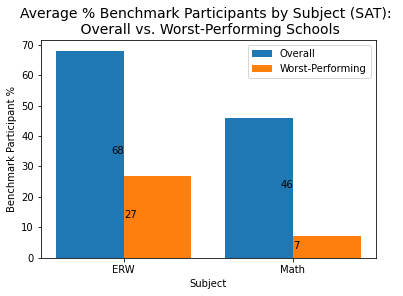

In [23]:
# Average % Benchmark Participants by Subject (SAT): Overall vs. Worst-Performing Schools

# Plotting a barchart
plt.bar(np.arange(2) -0.2, sat_benchmark_avg, width=0.4, label = 'Overall')
plt.bar(np.arange(2) +0.2, sat_benchmark_below_10_perc_benchmark_avg, width=0.4, label = 'Worst-Performing')

if __name__ == '__main__':
    x = ['ERW','MATH']
    y1 = [68,46]
    y2 = [27,7]

add_labels_bar(x,y1,ha='right')
add_labels_bar(x,y2,ha='left')

plt.title('Average % Benchmark Participants by Subject (SAT): \n Overall vs. Worst-Performing Schools', fontsize=14)
plt.xlabel('Subject')
plt.ylabel('Benchmark Participant %')
plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
plt.legend();

Overall, 68% of participants met or exceeded the ERW benchmark, and 46% met or exceeded the Math benchmark. Of the worst-performing schools, 27% met or exceeded the ERW benchmark, and 7% met the Math benchmark. The averages between the overall and worst-performing schools seem to be off by around 40%. 

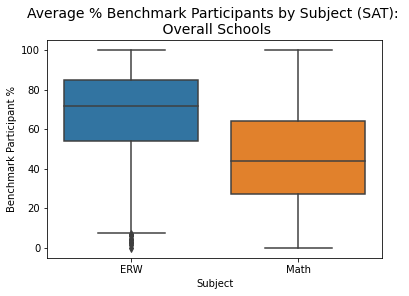

In [24]:
# Average % Benchmark Participants by Subject (SAT): Overall Schools

sns.boxplot(data=sat[['pct_erw_benchmark','pct_math_benchmark']])

plt.title('Average % Benchmark Participants by Subject (SAT): \n Overall Schools', fontsize=14)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
plt.ylabel('Benchmark Participant %');

The box plot above shows the center and the spread of the overall average percentages of participants that met both subject benchmarks. The center for ERW is 68% and it's spread roughly spans from 55-85%. The center for Math is 46% and it's spread roughly spans from 30-65%. The whiskers for both extend as high as 100%, and as low as about 10% for ERW and 0% for Math. ERW has a few outliers that lie beyond the minimum.

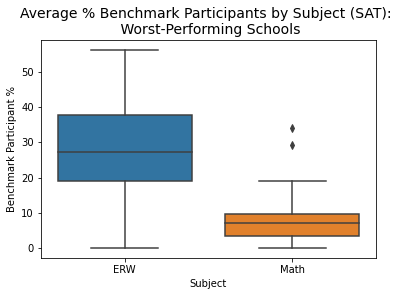

In [25]:
# Average % Benchmark Participants by Subject (SAT): Worst-Performing Schools

sns.boxplot(data=sat_benchmark_below_10_perc[['pct_erw_benchmark','pct_math_benchmark']])

plt.title('Average % Benchmark Participants by Subject (SAT): \n Worst-Performing Schools', fontsize=14)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
plt.ylabel('Benchmark Participant %');

This box plot shows the center and spread of the worst-performing school average percentages of participants that met both subject benchmarks. The center for ERW is 27% and it's spread roughly spans from 20-35%. The whiskers extend as high as 60% and as low as 0%. The center for Math is 7% and it's spread roughly spans from 5-10%. The whiskers there extend as high as 20% and as low as 0%. Math has a couple outliers that lie beyond the maximum.

### 3.3. SAT Summary

The counties most associated with worst-performing schools are Los Angeles, Riverside and Fresno.

As for subjects, considering that both subject benchmarks need to be met, it seems that Math is giving participants more difficulty.

---

## 4. Insights

### 4.1. By school, district & county

Between the ACT and SAT, the ACT had more districts with higher benchmark student percentages giving it more of a left-skewed distribution, while the SAT held more of a normal distribution with more districts concentrated in the middle percentiles.

In the ACT dataset, there were 353 districts represented and 29 (8%) of those had schools with less than 10% benchmark participants. In the SAT dataset, there were 406 districts represented and 38 (9%) of those had schools with less than 10% benchmark participants.

Between the ACT and SAT datasets, there were 52 distinct districts and there was a heavier concentration of these worst-performing districts in 3 counties: Los Angeles, Fresno and Riverside. Respectively, they claim 11, 6, and 6 worst-performing districts, and together they make up 44% of the worst-performing districts.

### 4.2. By subject

The ACT dataset provided each school's average score by subject, through which the state's average score by subject was determined, and are as follows: Reading (22), English (21), Math (21) and Science (21). The worst-performing schools' averages are: Reading (16), English (14), Math (16) and Science (16).

Based on these averages, there is no subject that can be considered worst-performing, either overall or at worst-performing schools.

The SAT dataset provided each school's percent of participants who met or exceeded the benchmark, through which the state's average percent of participants who met or exceeded the benchmark was determined, and are as follows: Evidence-Based Reading & Writing (68%) and Math (46%). The worst-performing school's averages are: Evidence-Based Reading & Writing (27%) and Math (7%).

Based on these averages, Math is the subject that is giving participants significant difficulty, both overall and at worst-performing schools.

---

## 5. Conclusion, Recommendations & Next Steps

The recommendation is to start by focusing on the districts in the top 3 counties with the most number of worst-performing districts: Los Angeles, Fresno & Riverside.  These counties/districts will require a higher quality of instruction & delivery style on all subjects with an emphasis on Math.

As next steps, since there were some limitations in this analysis, a separate analysis will be beneficial to assess the current quality of instruction and delivery style at these worst-performing districts. This will allow the state to determine what exactly needs to be implemented and/or changed so that the state can make an efficient use of its resources. 